In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline

## 统计函数用时：
+ cv2.getTickCount 统计函数块被执行的时钟数
+ cv2.getTickFrequency 返回时钟频率，或者说每秒钟的时钟数(固定值)

0.242523228 s


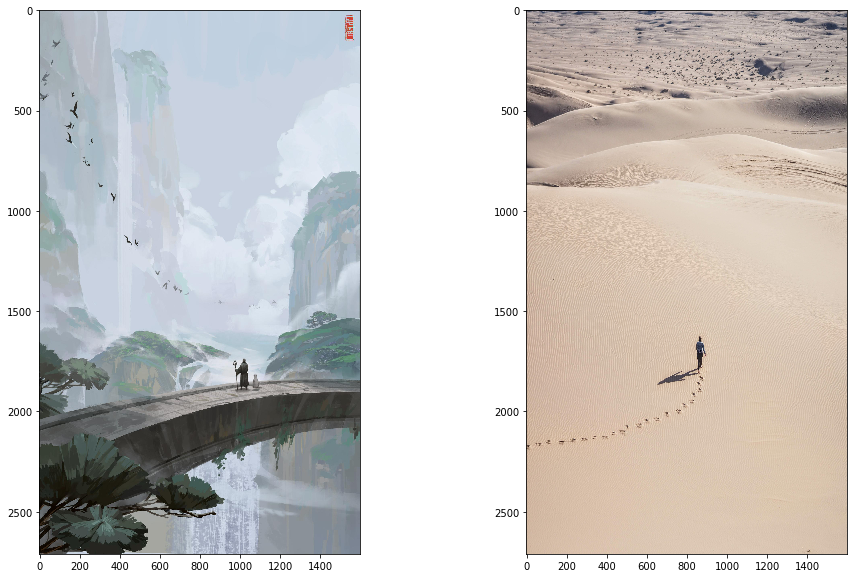

In [6]:
t1 = cv2.getTickCount()

img_path_1 = './img2.jpg'
img_1 = cv2.imread(img_path_1)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

img_path_2 = './img3.jpg'
img_2 = cv2.imread(img_path_2)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
img_2 = cv2.resize(img_2, (img_1.shape[1], img_1.shape[0]))

t2 = cv2.getTickCount()
time = (t2 - t1) / cv2.getTickFrequency()
print(time, 's')

fig, ax = plt.subplots(1, 2, figsize=[16, 10])
# ax.set_axis_off()
ax[0].imshow(img_1)
ax[1].imshow(img_2)
plt.show()

In [9]:
t1 = cv2.getTickCount()
for i in range(5, 49, 2):
    img = cv2.medianBlur(img_1, i)
t2 = cv2.getTickCount()
t = (t2 - t1) / cv2.getTickFrequency()
print(t)

6.417492929


### opencv优化过的函数，使用cv2.useOptimized()查看是否开启自动优化，并可以使用cv2.setUseOptimized()手动启动优化

In [17]:
cv2.setUseOptimized(True)

In [18]:
cv2.useOptimized()

True

In [19]:
%timeit res = cv2.medianBlur(img_1, 49)

306 ms ± 6.18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [20]:
cv2.setUseOptimized(False)

In [21]:
cv2.useOptimized()

False

In [22]:
%timeit res = cv2.medianBlur(img_1, 49)

305 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### 比较Python和numpy对scalar乘法的运算效率
对数据较少的情况下Python比numpy效率高

In [23]:
x = 5

In [25]:
%timeit y = x ** 2

157 ns ± 2.48 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [26]:
%timeit y = x * x

33.8 ns ± 0.48 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [27]:
x = np.uint8([5])

In [28]:
%timeit y = x * x

372 ns ± 1.24 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [29]:
%timeit y = x ** 2

390 ns ± 6.62 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
%timeit y = np.square(x)

387 ns ± 8.89 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### 一般情况下同样功能的函数opencv要比numpy快，例外的情况是numpy对视图（非复制）进行操作要快于opencv

In [37]:
%timeit z = cv2.countNonZero(cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY))

1.15 ms ± 53.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%timeit z = np.count_nonzero(cv2.cvtColor(img_1, cv2.COLOR_RGB2GRAY))

9.18 ms ± 281 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
